## Tabular Data With NN

In [1]:
import pandas as pd
import numpy as np
from fastai.tabular import *
from fastai import *
from fastai.imports import *

In [2]:
data1 = pd.read_csv("training(1).csv")
data1.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [3]:
data1.drop("ID",axis=1,inplace=True)

In [4]:
data1.drop(["mobile_money","savings","borrowing","insurance"],axis=1,inplace=True)
data1.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,...,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude,mobile_money_classification
0,98,2,3,1,1,2,2,0,0,0,...,-1,2,-1,1,-1,4,4,-4.460442,29.811396,0
1,40,1,1,3,5,1,1,1,0,0,...,4,1,5,4,4,1,4,-6.176438,39.244871,3
2,18,2,4,6,3,2,1,0,0,0,...,-1,2,-1,1,-1,1,1,-6.825702,37.652798,2
3,50,1,1,3,1,1,1,0,0,0,...,2,2,-1,4,-1,1,4,-3.372049,35.808307,3
4,34,1,1,1,1,2,1,0,1,0,...,-1,1,1,1,-1,1,4,-7.179645,31.039095,3


In [5]:
label = data1[["mobile_money_classification"]] ## dropt it since it is the label
data1.drop("mobile_money_classification",axis=1,inplace=True)

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,log_loss

In [7]:
test_df = pd.read_csv("test.csv")

In [8]:
test_df.drop("ID",axis=1,inplace=True)

In [9]:
all_data = pd.concat((data1,test_df),axis=0)

In [10]:
all_data.tail()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude
2360,26,2,1,3,2,2,2,0,0,0,...,2,-1,2,-1,1,-1,1,4,-2.652871,32.288152
2361,50,2,1,3,1,2,2,0,0,0,...,2,-1,2,-1,1,-1,4,4,-3.410241,31.509764
2362,49,1,1,2,1,1,1,0,1,0,...,2,-1,2,-1,1,-1,1,4,-3.372177,33.911149
2363,28,2,1,3,5,2,1,0,1,0,...,2,-1,2,-1,1,-1,4,4,-1.681963,33.707227
2364,70,2,3,1,1,1,2,0,0,0,...,2,-1,2,-1,1,-1,4,4,-2.457108,33.636855


In [11]:
log_lat = all_data.loc[:, ["Latitude","Longitude"]]

## Additonal Features
we make use of the latitude and the longitude of banks for upload. The distance between each banks to the location of the users

In [12]:
## load the mobil-monry agent
mb_d = pd.read_csv("FSDT_FinAccessMapping/banks_for_upload_win.csv")
mb_d.head()

,region,district,ward,latitude,longitude,bank_type,bank_name,weekend_trading,yr_started,yr_started_reformatted
0,Dar es Salaam,Temeke,Mbagala,-6.92247,39.27113,Commercial Bank,Accessbank (Tanzania) Limited,Yes,16/05/11,2011-5-01
1,Shinyanga,Kahama,Kahama Mjini,-3.82858,32.60006,Commercial Bank,Accessbank (Tanzania) Limited,No,12/07/13,2013-7-01
2,Dar es Salaam,Temeke,Miburani,-6.86209,39.26233,Commercial Bank,Accessbank (Tanzania) Limited,Yes,05/03/98,1998-3-01
3,Dar es Salaam,Ilala,Kariakoo,-6.82157,39.28025,Commercial Bank,Accessbank (Tanzania) Limited,Yes,10/06/09,2009-6-01
4,Dar es Salaam,Ilala,Kariakoo,-6.81944,39.27418,Commercial Bank,Accessbank (Tanzania) Limited,Yes,18/12/13,2013-12-01


In [13]:
## get the latitude and longitude
mb_lat_long = mb_d.loc[:,["latitude","longitude"]]
mb_lat_long.head()

,latitude,longitude
0,-6.92247,39.27113
1,-3.82858,32.60006
2,-6.86209,39.26233
3,-6.82157,39.28025
4,-6.81944,39.27418


In [14]:
dist_pd = pd.DataFrame() # store d distance to be calculated

In [15]:
sm_mb = mb_lat_long[:40] #extract 40 rows

calculate distance

In [16]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [17]:
def calc_dist(dist_cal,data,coord_d,name):
    
    
    for i,(lat,long) in enumerate(coord_d.values):
        
        dist_pd[name+ str(i)] = dist_cal(data["Latitude"].values,data["Longitude"].values,lat,long)
        
    print("done")

In [18]:
calc_dist(haversine_array,all_data,sm_mb,"haversine")

done


In [19]:
calc_dist(dummy_manhattan_distance,all_data,sm_mb,"manhattan")

done


In [20]:
calc_dist(bearing_array,all_data,sm_mb,"bearing")

done


In [21]:
dist_pd.head()

,haversine0,haversine1,haversine2,haversine3,haversine4,haversine5,haversine6,haversine7,haversine8,haversine9,...,bearing30,bearing31,bearing32,bearing33,bearing34,bearing35,bearing36,bearing37,bearing38,bearing39
0,1081.807280,317.152939,1079.241528,1080.096800,1079.389764,1074.466102,1075.253202,338.050475,405.355653,1079.231345,...,104.777718,104.649060,104.624212,104.610235,104.482005,104.448525,81.228350,57.917147,81.226523,77.356395
1,83.005664,780.930183,76.265405,71.841802,71.571835,69.232007,66.747296,723.625401,812.107667,75.593694,...,-175.127703,-179.887339,178.771746,-178.832065,177.005225,176.092695,-42.411766,-60.250534,-42.408209,-70.781445
2,178.980397,651.100887,177.742523,179.683081,179.014074,174.526140,175.989190,571.945868,711.448586,177.885191,...,90.883497,90.549762,90.527231,90.200121,89.814354,89.696757,-15.648145,-47.954203,-15.645577,-59.459049
3,550.343952,359.636394,544.877556,543.090352,542.447802,537.640251,536.890300,379.864632,336.219570,544.507387,...,136.051945,135.510798,135.377305,135.531115,135.050317,134.939144,90.038272,-73.741202,90.022555,-98.252635
4,908.875191,410.716241,908.199516,910.400795,909.743997,905.357938,906.895977,309.539963,557.771200,908.387421,...,88.145255,88.104848,88.106633,88.032559,87.973443,87.953345,56.177126,21.782267,56.175926,25.032374


it will have being good to use PCA to reduce the dimension of the dist_pd, but pca did not improve the model

## clustering
We cluster the longitude and latitude to generate label which is the cluster id

In [22]:
from sklearn.cluster import KMeans

In [23]:
import matplotlib.pyplot as plt

In [24]:
id_n=3
kmeans = KMeans(n_clusters=id_n, random_state=0).fit(log_lat)
id_label=kmeans.labels_

/home/oni/anaconda2/envs/pytorchenv/lib/python3.7/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


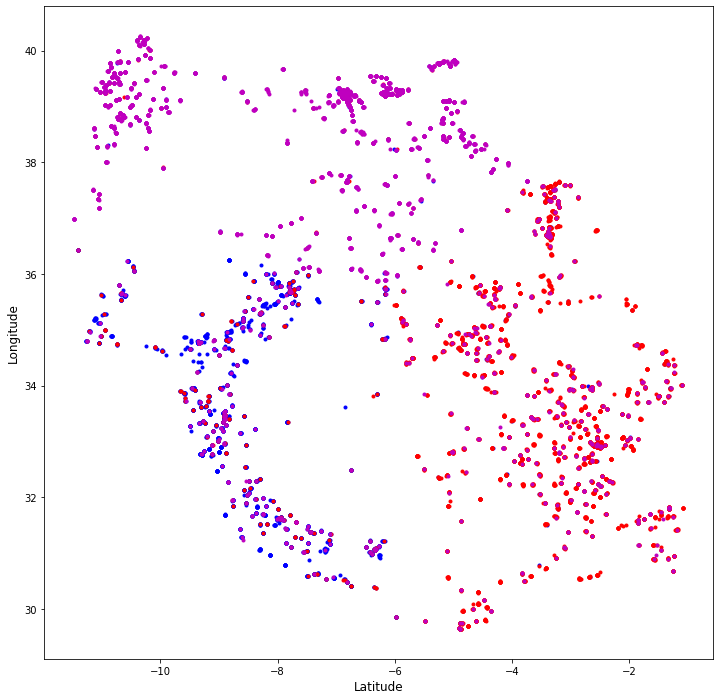

In [25]:
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);
plt.figure(figsize=(12,12))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(log_lat.Latitude[cluster].values,log_lat.Longitude[cluster].values,ptsymb[i])
plt.show()

In [26]:
len(id_label),len(test_df)

(9459, 2365)

In [27]:
all_data["clusters"] = id_label

In [28]:
all_data[["clusters"]].tail()

,clusters
2360,1
2361,1
2362,1
2363,1
2364,1


split the all_data into train and validation set

In [29]:
all_train = all_data[:len(data1)]
all_test= all_data[len(data1):]
len(all_train),len(all_test)

(7094, 2365)

In [30]:
all_test.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,...,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude,clusters
0,30,2,1,3,6,2,1,0,0,1,...,6,1,4,5,-1,1,4,-2.596421,32.913584,1
1,53,1,1,3,1,2,1,0,1,0,...,-1,1,4,1,-1,1,4,-1.778303,34.062640,1
2,23,2,1,3,5,1,1,0,0,0,...,4,1,4,1,-1,1,1,-1.851789,31.536866,1
3,30,2,3,3,4,1,2,0,1,0,...,-1,2,-1,1,-1,1,4,-1.235656,34.229012,1
4,28,2,1,5,4,2,1,0,0,0,...,4,1,6,4,3,1,2,-7.780934,35.691878,0


the `dist_pd` is also split into the train and validation set

In [33]:
all_train[list(dist_pd.columns)] = dist_pd[: len(data1)]
all_test[list(dist_pd.columns)] = dist_pd[len(data1):].reset_index().drop("index",axis=1)

/home/oni/anaconda2/envs/pytorchenv/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [34]:
all_test.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,...,bearing30,bearing31,bearing32,bearing33,bearing34,bearing35,bearing36,bearing37,bearing38,bearing39
0,30,2,1,3,6,2,1,0,0,1,...,124.433376,124.144382,124.076358,124.133886,123.870068,123.807158,101.734823,-10.504913,101.731019,-165.980147
1,53,1,1,3,1,2,1,0,1,0,...,134.929800,134.570347,134.481744,134.581859,134.261011,134.186529,121.375733,-122.582273,121.370929,-144.672248
2,23,2,1,3,5,1,1,0,0,0,...,123.459647,123.224261,123.169083,123.213887,122.998162,122.946531,106.577900,116.182113,106.575135,151.692421
3,30,2,3,3,4,1,2,0,1,0,...,138.751004,138.388212,138.297553,138.407169,138.085364,138.011258,131.092794,-134.057343,131.088448,-148.010453
4,28,2,1,5,4,2,1,0,0,0,...,75.147289,75.249761,75.305311,75.053569,75.084209,75.074553,12.683076,-28.003332,12.683649,-38.028658


In [35]:
all_train["label"] = label

/home/oni/anaconda2/envs/pytorchenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
all_train[["label"]].tail()

,label
7089,1
7090,3
7091,0
7092,3
7093,0


In [37]:
len(all_train.iloc[:,list(np.where(all_train.dtypes ==np.float)[0])].columns)

122

For preprocessing the data into the Neural Net, we define some value
1) the column for the label

2) list of columns containing categorical variable

3) list of column contiaining continous variable

4) list of the process we want,like fill missing , label -encoding, and normalization

In [38]:
label_col = 'label'
cat_names = list(all_train.iloc[:,list(np.where(all_train.dtypes !=np.float)[0])].columns[:-1])

cont_names = all_train.iloc[:,list(np.where(all_train.dtypes ==np.float)[0])].columns
procs = [FillMissing,Categorify,Normalize]

len(cat_names) + len(cont_names)

152

In [39]:
test = TabularList.from_df(all_test,cat_names=cat_names,cont_names=cont_names)

In [40]:
dt = (TabularList.from_df(all_train,cat_names=cat_names,cont_names=cont_names,procs=procs)
                           .random_split_by_pct(0.1)
                           .label_from_df(cols=label_col)
                           .add_test(test)
                           .databunch())

/home/oni/anaconda2/envs/pytorchenv/lib/python3.7/site-packages/fastai/data_block.py:212: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [41]:
dt.show_batch(rows=10)

Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,clusters,Latitude,Longitude,haversine0,haversine1,haversine2,haversine3,haversine4,haversine5,haversine6,haversine7,haversine8,haversine9,haversine10,haversine11,haversine12,haversine13,haversine14,haversine15,haversine16,haversine17,haversine18,haversine19,haversine20,haversine21,haversine22,haversine23,haversine24,haversine25,haversine26,haversine27,haversine28,haversine29,haversine30,haversine31,haversine32,haversine33,haversine34,haversine35,haversine36,haversine37,haversine38,haversine39,manhattan0,manhattan1,manhattan2,manhattan3,manhattan4,manhattan5,manhattan6,manhattan7,manhattan8,manhattan9,manhattan10,manhattan11,manhattan12,manhattan13,manhattan14,manhattan15,manhattan16,manhattan17,manhattan18,manhattan19,manhattan20,manhattan21,manhattan22,manhattan23,manhattan24,manhattan25,manhattan26,manhattan27,manhattan28,manhattan29,manhattan30,manhattan31,manhattan32,manhattan33,manhattan34,manhattan35,manhattan36,manhattan37,manhattan38,manhattan39,bearing0,bearing1,bearing2,bearing3,bearing4,bearing5,bearing6,bearing7,bearing8,bearing9,bearing10,bearing11,bearing12,bearing13,bearing14,bearing15,bearing16,bearing17,bearing18,bearing19,bearing20,bearing21,bearing22,bearing23,bearing24,bearing25,bearing26,bearing27,bearing28,bearing29,bearing30,bearing31,bearing32,bearing33,bearing34,bearing35,bearing36,bearing37,bearing38,bearing39,target
36,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,-1,1,-1,2,-1,2,-1,1,-1,3,4,0,-0.6740,0.0201,-0.3930,0.0987,-0.3841,-0.3752,-0.3757,-0.3787,-0.3736,-0.2469,0.2855,-0.3829,-0.3749,-0.3789,-0.3754,-0.3756,0.0756,-0.3921,-0.3974,-0.3850,-0.3779,-0.3777,-0.3766,-1.4806,-0.3727,-0.3868,-0.3777,-0.3808,-0.3739,0.0794,-0.3673,0.0751,-0.3939,-0.3831,-0.3807,-0.3835,-0.3749,-0.3730,0.0758,0.2855,0.0758,0.0982,-0.4666,0.2357,-0.4463,-0.4313,-0.4311,-0.4282,-0.4198,-0.0221,0.3015,-0.4441,-0.4299,-0.4283,-0.4304,-0.4212,-0.0072,-0.4648,-0.4577,-0.4482,-0.4343,-0.4338,-0.4327,-1.4459,-0.4277,-0.3673,-0.4269,-0.4288,-0.4196,0.1476,-0.3910,-0.0097,-0.4499,-0.4400,-0.4384,-0.4381,-0.4302,-0.4284,-0.0082,0.3018,-0.0081,0.2350,-0.1489,0.1147,-0.1399,-0.1473,-0.1459,-0.0565,-0.0936,0.0234,0.0618,-0.1434,-0.1455,-0.0518,-0.1458,-0.0608,-0.1672,-0.1482,0.0589,-0.1389,-0.1439,-0.1426,-0.1431,-0.0947,-0.1501,0.0359,-0.0632,0.0021,-0.0879,-0.2275,0.0283,-0.1545,0.0583,-0.0866,-0.1338,-0.0407,-0.1460,-0.1507,-0.1617,0.0704,-0.1617,0.1110,1
31,2,1,3,3,2,1,0,1,0,0,0,0,0,0,0,0,0,-1,1,-1,2,-1,2,-1,1,-1,1,4,1,0.8264,-1.6683,1.6337,-1.0130,1.6297,1.6268,1.6268,1.6273,1.6258,-0.8424,-0.8211,1.6292,1.6266,1.6274,1.6267,1.6264,0.8126,1.6333,1.6339,1.6300,1.6275,1.6274,1.6271,1.4605,1.6261,1.6350,1.6270,1.6280,1.6259,0.9959,1.6244,0.8107,1.6325,1.6289,1.6283,1.6289,1.6266,1.6262,0.8110,-0.8226,0.8109,-1.0106,1.5677,-1.1089,1.5580,1.5510,1.5509,1.5496,1.5456,-0.6933,-0.7540,1.5570,1.5503,1.5496,1.5505,1.5464,0.2976,1.5668,1.5643,1.5589,1.5524,1.5521,1.5516,1.4013,1.5493,1.5239,1.5490,1.5501,1.5456,0.4490,1.5328,0.2952,1.5607,1.5551,1.5543,1.5543,1.5504,1.5496,0.2966,-0.7553,0.2967,-1.1067,0.3224,1.8415,0.3478,0.3614,0.3619,0.4129,0.4015,1.8249,1.7414,0.3488,0.3639,0.4155,0.3629,0.4180,1.0234,0.3243,0.4630,0.3463,0.3595,0.3608,0.3615,0.9023,0.3638,0.5444,0.4102,0.4477,0.4047,0.9675,0.4879,1.0247,0.4691,0.3818,0.3598,0.4106,0.3633,0.3628,1.0266,1.7598,1.0271,1.8307,1
36,2,1,1,3,2,2,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,2,-1,2,-1,1,-1,4,4,1,1.5055,-0.8555,1.1859,-1.0892,1.1758,1.1682,1.1681,1.1669,1.1626,-0.6153,-1.5637,1.1747,1.1675,1.1669,1.1678,1.1634,-0.2088,1.1850,1.1818,1.1767,1.1698,1.1695,1.1689,1.0033,1.1663,1.1280,1.1662,1.1672,1.1626,-0.0205,1.1474,-0.2106,1.1778,1.1728,1.1719,1.1719,1.1676,1.1666,-0.2106,-1.5636,-0.2106,-1.0884,1.4243,-1.1061,1.4142,1.4071,1.4069,1.4051,1.4011,-0.8394,-1.5276,1.4132,1.4064,1.4051,1.4066,1.4017,-0.1932,1.4234,1.4196,1.4151,1.4084,1.4081,1.4077,1.1435,1.4054,1.3696,1.4045,1.4054,1.40

## Model 

Create a  layer contains two hidden layers of 500 and 200 neurons.

we add a drop out for the hidden layer as `ps` 

and also gives the embedding a drop out `emb_drop`too

In [42]:
learn = tabular_learner(dt,layers=[500,200],ps=[0.001,0.001],emb_drop=0.05,metrics=accuracy)

### model Architecture

1)the number of embedding equals to the number of categorical variable

2) e.g EMbedding(84,19), this embedding is for `Q1` which is for the age. it has 84 unique character and the 19 is the dimension chose by defaul by the library. same to all othe embedding

3) the batchnorm has dimension of 122 which is the number of continous variable.

4) ALl the embediings are concatenated to form one embedding

In [43]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(84, 19)
    (1): Embedding(3, 3)
    (2): Embedding(5, 4)
    (3): Embedding(9, 5)
    (4): Embedding(7, 5)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(3, 3)
    (8): Embedding(3, 3)
    (9): Embedding(3, 3)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(3, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
    (17): Embedding(3, 3)
    (18): Embedding(8, 5)
    (19): Embedding(12, 6)
    (20): Embedding(12, 6)
    (21): Embedding(3, 3)
    (22): Embedding(8, 5)
    (23): Embedding(3, 3)
    (24): Embedding(8, 5)
    (25): Embedding(6, 4)
    (26): Embedding(7, 5)
    (27): Embedding(6, 4)
    (28): Embedding(6, 4)
    (29): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.05)
  (bn_cont): BatchNorm1d(122, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=250, out

In [44]:
learn.fit(4,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.887471,0.831803,0.634697,00:02
1,0.803106,0.778440,0.672779,00:01
2,0.770939,0.811165,0.665726,00:01
3,0.768015,0.791162,0.685472,00:01


In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


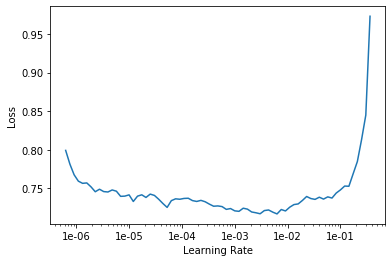

In [46]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(2, 1e-6,wd=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.736786,0.790388,0.692525,00:01
1,0.740449,0.791636,0.688293,00:01


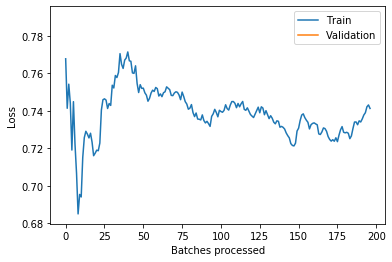

In [50]:
learn.recorder.plot_losses(skip_end=1)

## Inference 
Predict for the test set

In [51]:
preds = learn.get_preds(DatasetType.Test)

In [52]:
sub = pd.read_csv("sample_submission(1).csv")

In [53]:
preds1 = preds[0].numpy()
preds1 = np.clip(preds1,0.025,0.975)

In [54]:
sub_df = pd.DataFrame(data=np.round(preds1,3),columns=sub.columns[1:])
sub_df["ID"] = sub["ID"]

In [55]:
sub_df.head()

,no_financial_services,other_only,mm_only,mm_plus,ID
0,0.025,0.025,0.127,0.870,2352
1,0.025,0.025,0.187,0.776,8208
2,0.025,0.025,0.091,0.904,2785
3,0.172,0.510,0.053,0.264,2967
4,0.025,0.025,0.025,0.975,1697


In [56]:
sub_df.to_csv("catboost.csv",index=False)

In [57]:
sub.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.5423,0.9987,0.12,0.0123
1,8208,NaN,NaN,NaN,NaN
2,2785,NaN,NaN,NaN,NaN
3,2967,NaN,NaN,NaN,NaN
4,1697,NaN,NaN,NaN,NaN


In [58]:
sub["no_financial_services"] = sub_df["no_financial_services"]
sub["other_only"] = sub_df["other_only"]
sub["mm_only"] = sub_df["mm_only"]
sub["mm_plus"] = sub_df["mm_plus"]

In [59]:
sub.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.025,0.025,0.127,0.870
1,8208,0.025,0.025,0.187,0.776
2,2785,0.025,0.025,0.091,0.904
3,2967,0.172,0.510,0.053,0.264
4,1697,0.025,0.025,0.025,0.975


In [60]:
sub.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.025,0.025,0.127,0.870
1,8208,0.025,0.025,0.187,0.776
2,2785,0.025,0.025,0.091,0.904
3,2967,0.172,0.510,0.053,0.264
4,1697,0.025,0.025,0.025,0.975


In [61]:
sub.to_csv("fastai5.csv",index=False)